<a href="https://colab.research.google.com/github/stevemoseti/AITermProject18m01acs037/blob/main/SentimentAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : This is a sentiment analysis program for tweetd fetched from twitter using python

In [ ]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# libs
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
n_words= set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud,STOPWORDS
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Twitter API credentils
consumerKey = "yoHpR3icFJyg0Xh8zdPjaLY0u"
consumerSecret = "2d0SWD4FyP0He4mCBTRDPnZPFMWlS9gwQKPuO3rqCC5DB2eoUO"
accessToken = "1298656739420708864-bRR10kyz4ydW07adxXOAiAxRVrowAa"
accessTokenSecret = "EGfUfGJJqw8hxnOBkQaShAhTjAEOnr2Cbqz7Lia6yW39a"

In [ ]:
# create the authenthication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
# set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
# create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True, wait_on_rate_limit_notify=True)


In [ ]:
# extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "IMDB", count = 100, lang="en", tweet_mode="extended" )
# print the last 5 tweets from the account
print ('show the 5 recent tweets: \n')
i=1
for tweet in posts[0:50]:
  print (str(i) + ')'+tweet.full_text +'\n')
  i = i+1

show the 5 recent tweets: 

1)Check out the current standings of IMDb fans' #Oscar predictions. Which film do you think will take home Best Picture? Get your vote in now! 🗳️ 🏆 👉 https://t.co/tjRCRNCn9h https://t.co/DlnoaR8iMb

2)Take a closer look at the various roles #Oscar-nominated Nicole Kidman has played throughout her acting career. Which is your favorite? 

#Sponsored by @hbomax https://t.co/bNMQa15V6J

3)#TheLostCity co-stars #SandraBullock and #DanielRadcliffe answer our questions about working with Brad Pitt, seeing @channingtatum's 🍑, and where, exactly, the missing D in the Lost City went. https://t.co/i3zFnexOgL https://t.co/tW4k1Wgisv

4)Celebrating all of the incredible @WomenInFilm at the #WIFOscars Party 🎥✨ See our full gallery of #IMDbStudio portraits here: https://t.co/h6VVmka0tV https://t.co/P7IiFobxHZ

5)From #Cyrano to #WestSideStory, we take a look at the 2022 #Oscar contenders for Best Costume Design.  Which film do you think should win? @theacademy #Cruella #Du

In [ ]:
#create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
# show the first 50 rows of data
df.head()

,Tweets
0,Check out the current standings of IMDb fans' ...
1,Take a closer look at the various roles #Oscar...
2,#TheLostCity co-stars #SandraBullock and #Dani...
3,Celebrating all of the incredible @WomenInFilm...
4,"From #Cyrano to #WestSideStory, we take a look..."


In [ ]:
# Clean the text
# create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #remove @mentions
  text = re.sub(r'#','',text) #removing the # symbol
  text =  re.sub(r'RT[\s]','',text) #remove RT
  text = re.sub(r'https?:\/\/\S+','', text) # remove teh hyper link

  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt) 
#show cleaned text
df


,Tweets
0,Check out the current standings of IMDb fans' ...
1,Take a closer look at the various roles Oscar-...
2,TheLostCity co-stars SandraBullock and DanielR...
3,Celebrating all of the incredible at the WIFO...
4,"From Cyrano to WestSideStory, we take a look a..."
...,...
95,Hang it in the Louvre. KristenStewart SpiritAw...
96,"AndrewGarfield makes our hearts go tick, tick…..."
97,🚨 A WhiteLotus reunion at the SpiritAwards! We...
98,TFW the SpiritAwards come to town. HannahEinbi...


In [ ]:
#stemming

def clean(text):

#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    text = ''.join(text)
    return text
df['Tweets'] = df['Tweets'].apply(lambda text: stemming(text))
df


In [146]:
#lemmatization
def lemmatizing(words):
    lemmatizer =WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in words]
    text = ''.join(text)
    return text
df['Tweets'] = df['Tweets'].apply(lambda x: lemmatizing(x))
df

,Tweets,subjectivity,Polarity,Analysis
0,"[c, , , , , , , , ., , , , , , , ...",0.0,0.0,Neutral
1,"[t, , , , , , , , ., , , , , , , ...",0.0,0.0,Neutral
2,"[t, , , , , , , , ., , , , , , , ...",0.0,0.0,Neutral
3,"[c, , , , , , , , ., , , , , , , ...",0.0,0.0,Neutral
4,"[f, , , , , , , , ., , , , , , , ...",0.0,0.0,Neutral
...,...,...,...,...
95,"[h, , , , , , , , ., , , , , , , ...",0.0,0.0,Neutral
96,"[a, , , , , , , , ., , , , , , , ...",0.0,0.0,Neutral
97,"[a, , , , , , , , ., , , , , , , ...",0.0,0.0,Neutral
98,"[t, , , , , , , , ., , , , , , , ...",0.0,0.0,Neutral


In [ ]:
#create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

  #create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
 
 #create teh two new columns
df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with the new columns
df

,Tweets,subjectivity,Polarity
0,C h e c k o u t t h e c u r r e n t s ...,0.0,0.0
1,T a k e a c l o s e r l o o k a t t ...,0.0,0.0
2,T h e L o s t C i t y c o - s t a r s S a ...,0.0,0.0
3,C e l e b r a t i n g a l l o f t h e ...,0.0,0.0
4,F r o m C y r a n o t o W e s t S i d e ...,0.0,0.0
...,...,...,...
95,H a n g i t i n t h e L o u v r e . ...,0.0,0.0
96,A n d r e w G a r f i e l d m a k e s o u ...,0.0,0.0
97,🚨 A W h i t e L o t u s r e u n i o n ...,0.0,0.0
98,T F W t h e S p i r i t A w a r d s c o ...,0.0,0.0


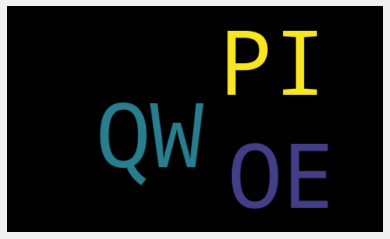

In [ ]:
#plot the word cloud
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#create a function to compute the negative , neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the datafram
df

  

,Tweets,subjectivity,Polarity,Analysis
0,C h e c k o u t t h e c u r r e n t s ...,0.0,0.0,Neutral
1,T a k e a c l o s e r l o o k a t t ...,0.0,0.0,Neutral
2,T h e L o s t C i t y c o - s t a r s S a ...,0.0,0.0,Neutral
3,C e l e b r a t i n g a l l o f t h e ...,0.0,0.0,Neutral
4,F r o m C y r a n o t o W e s t S i d e ...,0.0,0.0,Neutral
...,...,...,...,...
95,H a n g i t i n t h e L o u v r e . ...,0.0,0.0,Neutral
96,A n d r e w G a r f i e l d m a k e s o u ...,0.0,0.0,Neutral
97,🚨 A W h i t e L o t u s r e u n i o n ...,0.0,0.0,Neutral
98,T F W t h e S p i r i t A w a r d s c o ...,0.0,0.0,Neutral


In [ ]:
#print all positive tweets
k=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== "Positive"):
    print(str(k)+')'+ sortedDF['Tweets'][i])
    print()
    k = k+1

1)T h e   A c a d e m y   A w a r d   f o r   B e s t   C o s t u m e   D e s i g n   w a s   f i r s t   g i v e n   o u t   i n   1 9 4 9   i n   t w o   s u b c a t e g o r i e s :   o n e   f o r   f i l m s   i n   b l a c k   a n d   w h i t e   a n d   o n e   f o r   f i l m s   i n   c o l o r .  

2)Q u e e n   e n e r g y .   👑 ✨   K r i s t e n S t e w a r t   S p e n c e r   S p i r i t A w a r d s   ( 📷   :     )  



In [ ]:
from posixpath import join
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== "Negative"):
    print(str(j)+')'+ sortedDF['Tweets'][i])
    print()
    j = j+1

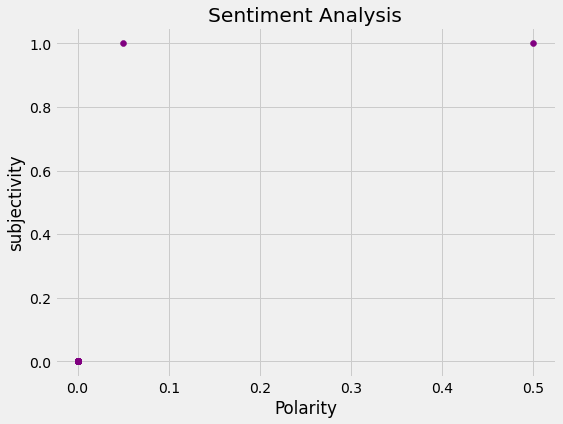

In [ ]:
#plot the polartiy and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['subjectivity'][i],color='purple')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.show()


In [ ]:
#GET the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/ df.shape[0]) * 100,1)

2.0

In [ ]:
#GET the percentage of Negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/ df.shape[0]) * 100,1)

0.0

In [ ]:
#GET the percentage of Neutral tweets
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/ df.shape[0]) * 100,1)

98.0

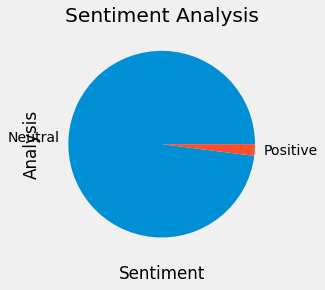

In [ ]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts on a bie chart
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'pie')
plt.show()


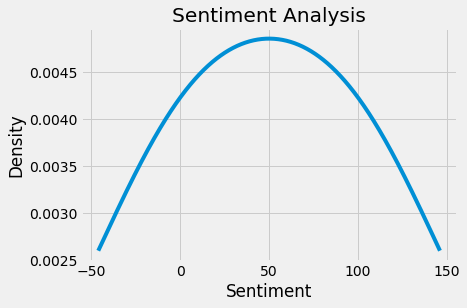

In [ ]:
#plot and visualize the Table
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'kde')
plt.show()